目前使用LOP為定義之實驗數據採用36筆，加上Mean

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre
from scipy import stats

In [2]:
# TIP = pd.read_csv(os.path.join("/root/LR_ML", "0507.xlsx"))
# TIP = pd.read_excel('0507.xlsx', index_col=None)
# TIP = pd.read_csv(os.path.join('/root/LR_ML', 'Data_Sorted.csv'), error_bad_lines=False)
os.getcwd()

'/root/LR_ML'

In [3]:
datafile = u"/root/LR_ML/newData_mean5.xlsx"
TIP0 = pd.read_excel(datafile)

In [4]:
TIP = pd.DataFrame(TIP0)

In [5]:
TIP.head()

,SBPI,SBPL,SBPM,DBPI,DBPL,DBPM,BPMI,BPML,BPMM,LOP
0,133,140,136.5,85,88,86.5,83,94,88.5,140.0
1,135,128,131.5,89,92,90.5,92,90,91.0,140.0
2,113,110,111.5,64,68,66.0,70,75,72.5,120.0
3,116,118,117.0,73,71,72.0,72,77,74.5,120.0
4,114,123,118.5,71,73,72.0,83,78,80.5,120.0


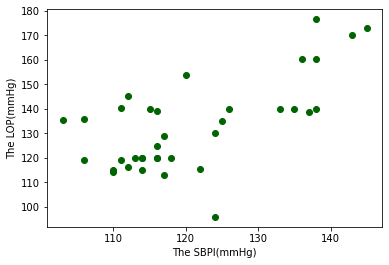

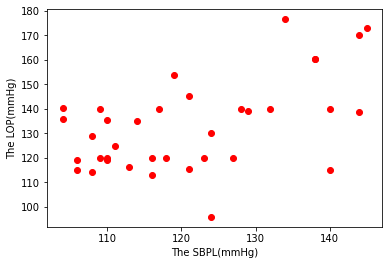

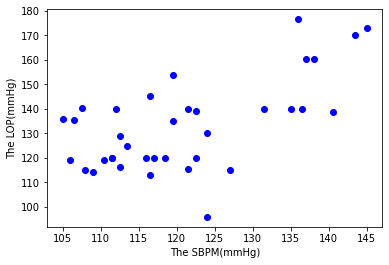

In [6]:
modTIP = TIP
#繪製散點圖,examDf.jt爲X軸，examDf.hk爲Y軸
plt.scatter(modTIP.SBPI,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
#添加圖的標籤（x軸，y軸）
plt.xlabel("The SBPI(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
plt.scatter(modTIP.SBPL,modTIP.LOP,color = 'red',label = "Exam Data")
plt.xlabel("The SBPL(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
plt.scatter(modTIP.SBPM,modTIP.LOP,color = 'blue',label = "Exam Data")
plt.xlabel("The SBPM(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

             SBPI        SBPL        SBPM       DBPI        DBPL       DBPM  \
count   36.000000   36.000000   36.000000  36.000000   36.000000  36.000000   
mean   120.861111  121.111111  120.986111  76.000000   75.111111  75.555556   
std     11.432167   12.765529   11.574903  11.245316   11.178494  10.396275   
min    103.000000  104.000000  105.000000  58.000000   60.000000  60.000000   
25%    112.750000  110.000000  111.875000  67.750000   67.750000  67.625000   
50%    116.500000  118.500000  119.000000  73.000000   71.000000  72.500000   
75%    127.750000  129.750000  128.125000  85.250000   80.250000  81.500000   
max    145.000000  145.000000  145.000000  99.000000  102.000000  98.500000   

             BPMI        BPML        BPMM         LOP  
count   36.000000   36.000000   36.000000   36.000000  
mean    82.861111   81.777778   82.319444  133.033333  
std     11.598406   10.826188   10.701237   18.621293  
min     57.000000   59.000000   58.000000   95.900000  
25%     

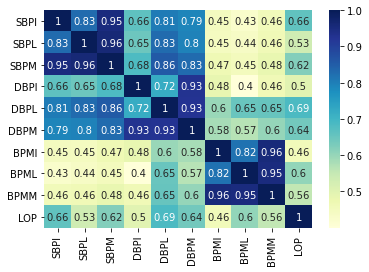

In [7]:
print(modTIP.describe())
rDf = modTIP.corr()#查看數據間的相關係數
print(rDf)
sns.heatmap(modTIP.corr(),annot=True, cmap="YlGnBu")

In [8]:
def t_test(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1)
    std2 = np.std(group2)
    nobs1 = len(group1)
    nobs2 = len(group2)
    
    modified_std1 = np.sqrt(np.float32(nobs1)/
                    np.float32(nobs1-1)) * std1
    modified_std2 = np.sqrt(np.float32(nobs2)/
                    np.float32(nobs2-1)) * std2
    (statistic, pvalue) = stats.ttest_ind_from_stats( 
               mean1=mean1, std1=modified_std1, nobs1=nobs1,   
               mean2=mean2, std2=modified_std2, nobs2=nobs2 )
    return statistic, pvalue

In [9]:
print(t_test(modTIP.SBPI, modTIP.SBPL))
print(t_test(modTIP.SBPI, modTIP.SBPM))
print(t_test(modTIP.SBPL, modTIP.SBPM))
print(t_test(modTIP.DBPI, modTIP.DBPL))
print(t_test(modTIP.DBPI, modTIP.DBPM))
print(t_test(modTIP.DBPL, modTIP.DBPM))
print(t_test(modTIP.BPMI, modTIP.BPML))
print(t_test(modTIP.BPMI, modTIP.BPMM))
print(t_test(modTIP.BPML, modTIP.BPMM))
print(t_test(modTIP.SBPI, modTIP.LOP))
print(t_test(modTIP.SBPL, modTIP.LOP))
print(t_test(modTIP.SBPM, modTIP.LOP))
print(t_test(modTIP.DBPI, modTIP.LOP))
print(t_test(modTIP.DBPL, modTIP.LOP))
print(t_test(modTIP.DBPM, modTIP.LOP))
print(t_test(modTIP.BPMI, modTIP.LOP))
print(t_test(modTIP.BPML, modTIP.LOP))
print(t_test(modTIP.BPMM, modTIP.LOP))
print(t_test(modTIP.LOP, modTIP.LOP))

(-0.0875334151044136, 0.9304974528575206)
(-0.046100597789107085, 0.9633613372821189)
(0.04352401922982017, 0.9654077350038034)
(0.3363584520476962, 0.73760682280478)
(0.17412475949972328, 0.8622700170592705)
(-0.17468365769783098, 0.8618324708404917)
(0.40968152574375427, 0.6832905982036103)
(0.20594403654767676, 0.8374324148615948)
(-0.21350051384889687, 0.8315572079618349)
(-3.34240055700433, 0.0013360144801522326)
(-3.1684458930761923, 0.0022724360490357005)
(-3.296758209880775, 0.0015383548821949608)
(-15.730884532772977, 1.1207859902847477e-24)
(-16.001411317369584, 4.389309056426993e-25)
(-16.17052766665568, 2.454139699425419e-25)
(-13.722006952553123, 1.580248019044662e-21)
(-14.277507423703835, 2.0208478141825265e-22)
(-14.167752977305334, 3.024475879165455e-22)
(0.0, 1.0)


自變量---源數據: (36,) ；  訓練集: (28,) ；  測試集: (8,)
因變量---源數據: (36,) ；  訓練集: (28,) ；  測試集: (8,)


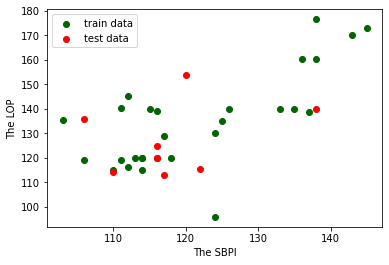

In [10]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.SBPI,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPI.shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#散點圖
plt.scatter(X_train, Y_train, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test, Y_test, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (36,) ；  訓練集: (28,) ；  測試集: (8,)
因變量---源數據: (36,) ；  訓練集: (28,) ；  測試集: (8,)


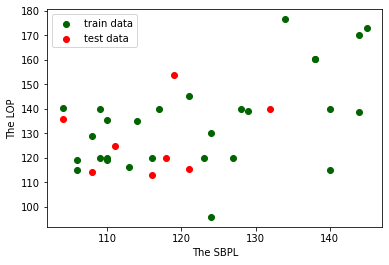

In [11]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(modTIP.SBPL,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPL.shape, "；  訓練集:",X_train2.shape, "；  測試集:",X_test2.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train2.shape, "；  測試集:",Y_test2.shape)
#散點圖
plt.scatter(X_train2, Y_train2, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test2, Y_test2, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPL")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (36,) ；  訓練集: (28,) ；  測試集: (8,)
因變量---源數據: (36,) ；  訓練集: (28,) ；  測試集: (8,)


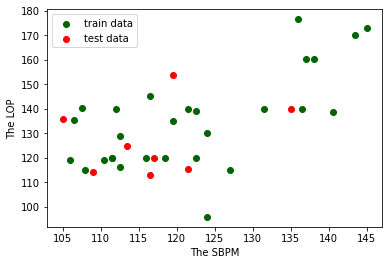

In [12]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(modTIP.SBPM,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPM.shape, "；  訓練集:",X_train3.shape, "；  測試集:",X_test3.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train3.shape, "；  測試集:",Y_test3.shape)
#散點圖
plt.scatter(X_train3, Y_train3, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test3, Y_test3, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPM")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

In [13]:
# plt.scatter(modTIP.SBP1, modTIP.TIP, color="darkgreen", label="分布")

In [14]:
# X_1 = np.array([1 for i in range(28)])
# x_train = np.array(X_train)
# x = np.zeros((28,2))
# x[:,0] = X_1
# x[:,1] = x_train
# #線性迴歸訓練
# model = LinearRegression()
# model.fit(x,Y_train)#調用線性迴歸包
# a  = model.intercept_#截距
# b = model.coef_#迴歸係數
# #訓練數據的預測值
# y_train_pred = model.predict(x)
# #繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
# plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
# #測試數據散點圖
# plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
# plt.scatter(X_test, Y_test, color='red', label="test data")
# #添加圖標標籤
# plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
# plt.xlabel("The SBP")#添加 X 軸名稱
# plt.ylabel("The TIP")#添加 Y 軸名稱
# plt.show()#顯示圖像
# print("擬合參數:截距",a,",迴歸係數：",b)
# print("最佳擬合線: Y = ",round(a,2),"+",round(b[1],2),"* X")
# #顯示線性方程，並限制參數的小數位爲兩位

In [15]:
q = np.array(X_train)#q原先shape是(28,0)
np.shape(q)
q = np.reshape(q, (28,1))#reshape換成(28,1)

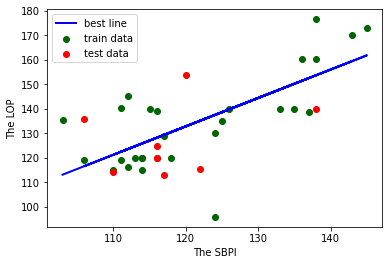

擬合參數:截距 -6.255634089479344 ,迴歸係數： [1.15894238]
最佳擬合線: Y =  -6.26 + 1.16 * X


In [16]:
model = LinearRegression()
model.fit(q,Y_train)#調用線性迴歸包
# model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#迴歸係數
#訓練數據的預測值
y_train_pred = model.predict(q)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a,",迴歸係數：",b)
print("最佳擬合線: Y = ",round(a,2),"+",round(b[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位

In [17]:
q2 = np.array(X_train2)#q原先shape是(28,0)
np.shape(q2)
q2 = np.reshape(q2, (28,1))#reshape換成(28,1)

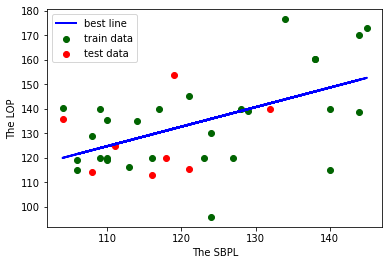

擬合參數:截距 37.10354169841855 ,迴歸係數： [0.79664845]
最佳擬合線: Y =  37.1 + 0.8 * X


In [18]:
model2 = LinearRegression()
model2.fit(q2,Y_train2)#調用線性迴歸包
# model.fit(X_train,Y_train)
a2  = model2.intercept_#截距
b2 = model2.coef_#迴歸係數
#訓練數據的預測值
y_train_pred2 = model2.predict(q2)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train2, y_train_pred2, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train2, Y_train2, color='darkgreen', label="train data")
plt.scatter(X_test2, Y_test2, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPL")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a2,",迴歸係數：",b2)
print("最佳擬合線: Y = ",round(a2,2),"+",round(b2[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位

In [19]:
q3 = np.array(X_train3)#q原先shape是(28,0)
np.shape(q3)
q3 = np.reshape(q3, (28,1))#reshape換成(28,1)

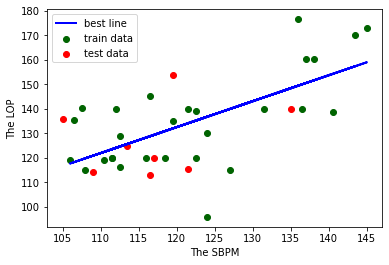

擬合參數:截距 5.484821305927085 ,迴歸係數： [1.05854176]
最佳擬合線: Y =  5.48 + 1.06 * X


In [20]:
model3 = LinearRegression()
model3.fit(q3,Y_train3)#調用線性迴歸包
# model.fit(X_train,Y_train)
a3  = model3.intercept_#截距
b3 = model3.coef_#迴歸係數
#訓練數據的預測值
y_train_pred3 = model3.predict(q3)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train3, y_train_pred3, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train3, Y_train3, color='darkgreen', label="train data")
plt.scatter(X_test3, Y_test3, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPM")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a3,",迴歸係數：",b3)
print("最佳擬合線: Y = ",round(a3,2),"+",round(b3[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位